# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
avail_city = []
lat = []
lon = []
temp = []
clouds = []
country = []
date = []
humidity = []
max_temp = []
wind = []
ind = 1
setkey = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print(f"Processing Record {ind} of Set {setkey} | {city}")
    response = requests.get(query_url + city)
    
    if response.status_code == 200:
        response = response.json()
        avail_city.append(city)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])  
        wind.append(response['wind']['speed'])  
    else:
        print ('City not found. Skipping...')
        
 
    if ind < 50:
        ind += 1
    else:  
        ind = 1
        setkey += 1
        time.sleep(5)

print("-----------------------------")  
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | muswellbrook
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | iranshahr
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | krosno odrzanskie
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | yerbogachen
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | bhimunipatnam
Processing Record 39 of Set 4 | la ronge
Processing Record 40 of Set 4 | bone
Processing Record 41 of Set 4 | pangkalanbuun
Processing Record 42 of Set 4 | fano
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | meadow lake
Processing Record 45 of Set 4 | yinchuan
Processing Record 46 of Set 4 | kuruman
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | kotar
Processing Record 49 of Set 4 | huanuni
Processing Record 50 of Set 4 | bundaberg
Processing Record 1 of Set 5 | ferrol
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | belaya gora
Processing Record 5 of Set 5 | pacocha
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 5 | sychevka
Processing Record 9 of Set 5 | guerrero negro
Processing R

Processing Record 27 of Set 8 | isangel
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | farah
Processing Record 30 of Set 8 | helmsdale
Processing Record 31 of Set 8 | merke
Processing Record 32 of Set 8 | kusa
Processing Record 33 of Set 8 | celendin
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | snezhnogorsk
Processing Record 36 of Set 8 | rocky mountain house
Processing Record 37 of Set 8 | ancud
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | jaguariaiva
Processing Record 40 of Set 8 | fatehpur
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | fort-shevchenko
Processing Record 44 of Set 8 | randfontein
Processing Record 45 of Set 8 | itaqui
Processing Record 46 of Set 8 | iquitos
Processing Record 47 of Set 8 | teya
Processing Record 48 of Set 8 | mecca
Processing Record 49 of Set 8 | cherskiy
Processing Record 50 of Set 8 | narayangarh
Processin

Processing Record 14 of Set 12 | valleyview
Processing Record 15 of Set 12 | darnah
Processing Record 16 of Set 12 | lyndon
Processing Record 17 of Set 12 | dingle
Processing Record 18 of Set 12 | sao felix do xingu
Processing Record 19 of Set 12 | chimore
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | batagay-alyta
Processing Record 22 of Set 12 | comodoro rivadavia
Processing Record 23 of Set 12 | along
Processing Record 24 of Set 12 | kugulta
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | axim
Processing Record 28 of Set 12 | letham
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | moron
Processing Record 31 of Set 12 | sokolo
Processing Record 32 of Set 12 | gazojak
Processing Record 33 of Set 12 | kyzyl-suu
Processing Record 34 of Set 12 | monte carmelo
Processing Record 35 of Set 12 | iida
Processing Record 36 of Set 12 | sola
Processing Record 37 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
weather_dict = {
    "City": avail_city,
    "Cloudiness": clouds,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lon,
    "Max_Temp" : max_temp,
    "Wind_Speed" : wind 
}
city_data = pd.DataFrame(weather_dict)

output_file = os.path.join("output_data", "cities.csv")

try:
    os.makedirs("output_data")
except FileExistsError:
    # directory already exists
    pass


city_data.index.names = ['City_ID']

city_data.to_csv(output_file, encoding='utf-8')
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,upernavik,97,GL,1593272389,83,72.79,-56.15,3.98,2.66
1,rikitea,19,PF,1593272390,73,-23.12,-134.97,22.23,6.57
2,qaanaaq,0,GL,1593272391,75,77.48,-69.36,5.34,1.88
3,vaini,20,TO,1593272391,94,-21.20,-175.20,23.00,1.50
4,hithadhoo,100,MV,1593272392,74,-0.60,73.08,29.31,3.64
...,...,...,...,...,...,...,...,...,...
552,askino,100,RU,1593272762,93,56.09,56.58,12.20,4.92
553,barra patuca,98,HN,1593272763,78,15.80,-84.28,28.13,4.07
554,savannah bight,99,HN,1593272769,78,16.45,-85.85,27.86,6.04


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
# weather_data = weather_data.loc[weather_data["Humidity"]<= 100]
clean_city_data = city_data.loc[weather_data["Humidity"]<= 100]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
0,upernavik,97,GL,1593272389,83,72.79,-56.15,3.98,2.66
1,rikitea,19,PF,1593272390,73,-23.12,-134.97,22.23,6.57
2,qaanaaq,0,GL,1593272391,75,77.48,-69.36,5.34,1.88
3,vaini,20,TO,1593272391,94,-21.20,-175.20,23.00,1.50
4,hithadhoo,100,MV,1593272392,74,-0.60,73.08,29.31,3.64
...,...,...,...,...,...,...,...,...,...
552,askino,100,RU,1593272762,93,56.09,56.58,12.20,4.92
553,barra patuca,98,HN,1593272763,78,15.80,-84.28,28.13,4.07
554,savannah bight,99,HN,1593272769,78,16.45,-85.85,27.86,6.04


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [59]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
if len(clean_city_data) < len(city_data):
    clean_city_data.to_csv(output_file, encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

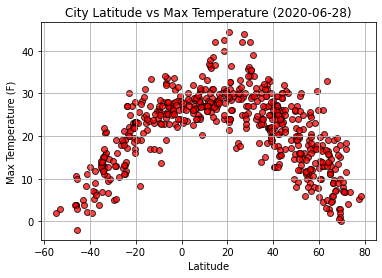

In [118]:
utc_time = datetime.datetime.fromtimestamp(
        int(clean_city_data["Date"][1])
    ).strftime('%Y-%m-%d')

plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title(f"City Latitude vs Max Temperature ({utc_time})")
plt.savefig('output_data\Fig1.png')

# Latitude vs. Humidity Plot

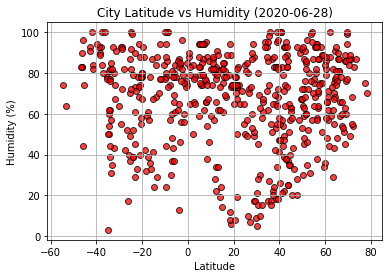

In [119]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title(f"City Latitude vs Humidity ({utc_time})")
plt.savefig('output_data\Fig2.png')

## Latitude vs. Cloudiness Plot

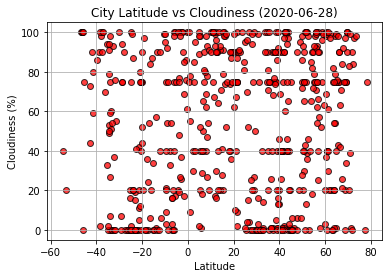

In [120]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({utc_time})")
plt.savefig('output_data\Fig3.png')

## Latitude vs. Wind Speed Plot

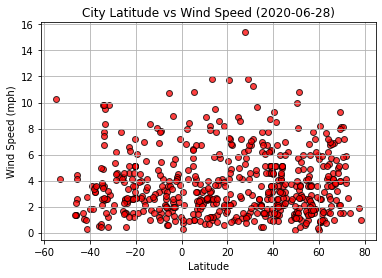

In [121]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({utc_time})")
plt.savefig('output_data\Fig4.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [87]:
# Create Northern and Southern Hemisphere DataFrames
north_city_data = clean_city_data.loc[clean_city_data["Lat"]> 0]
south_city_data = clean_city_data.loc[clean_city_data["Lat"]< 0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
City_ID,,,,,,,,,
1,rikitea,19,PF,1593272390,73,-23.12,-134.97,22.23,6.57
3,vaini,20,TO,1593272391,94,-21.20,-175.20,23.00,1.50
4,hithadhoo,100,MV,1593272392,74,-0.60,73.08,29.31,3.64
5,luderitz,0,NA,1593272392,52,-26.65,15.16,18.00,7.70
7,esperance,0,AU,1593272393,62,-33.87,121.90,13.00,3.60
...,...,...,...,...,...,...,...,...,...
539,monte carmelo,0,BR,1593272754,42,-18.72,-47.50,25.54,3.86
541,sola,57,VU,1593272755,84,-13.88,167.55,26.96,8.35
542,luanda,0,AO,1593272623,73,-8.84,13.23,22.74,5.46


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

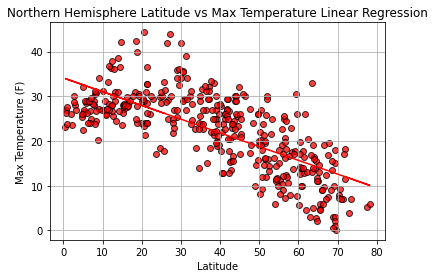

In [122]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Max_Temp"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Max Temperature Linear Regression")
plt.savefig('output_data\Fig5.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

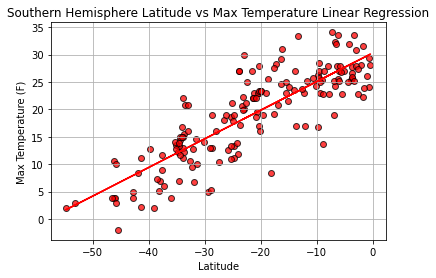

In [123]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Max_Temp"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Max_Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Max Temperature Linear Regression")
plt.savefig('output_data\Fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

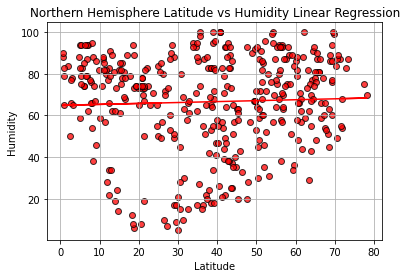

In [124]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Humidity"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Humidity Linear Regression")
plt.savefig('output_data\Fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

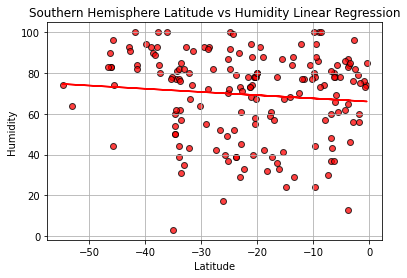

In [125]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Humidity"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Humidity Linear Regression")
plt.savefig('output_data\Fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

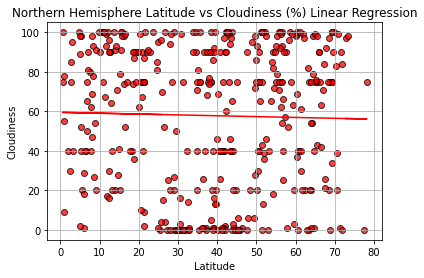

In [126]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Cloudiness"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("Northern Hemisphere Latitude vs Cloudiness (%) Linear Regression")
plt.savefig('output_data\Fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

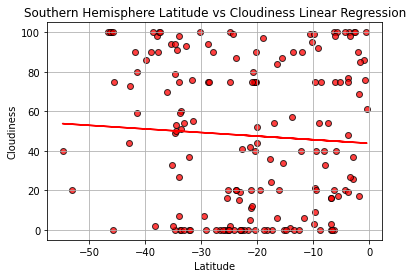

In [127]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Cloudiness"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Cloudiness Linear Regression")
plt.savefig('output_data\Fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

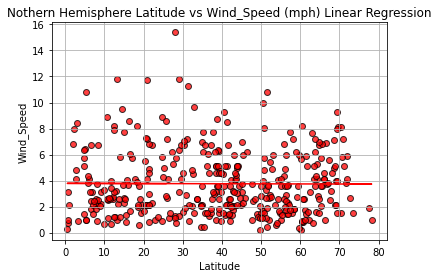

In [128]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_data["Lat"], north_city_data["Wind_Speed"])
regress_values = north_city_data["Lat"] * slope + intercept
plt.plot(north_city_data["Lat"],regress_values,"r-")

plt.scatter(north_city_data["Lat"], north_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid()
plt.title("Nothern Hemisphere Latitude vs Wind_Speed (mph) Linear Regression")
plt.savefig('output_data\Fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

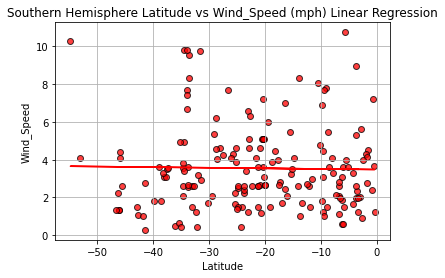

In [129]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_data["Lat"], south_city_data["Wind_Speed"])
regress_values = south_city_data["Lat"] * slope + intercept
plt.plot(south_city_data["Lat"],regress_values,"r-")

plt.scatter(south_city_data["Lat"], south_city_data["Wind_Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid()
plt.title("Southern Hemisphere Latitude vs Wind_Speed (mph) Linear Regression")
plt.savefig('output_data\Fig12.png')